In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd

# Load the training data
training_data_path = '/kaggle/input/training/training_data.csv'  # Update with your file path
training_data = pd.read_csv(training_data_path)
training_data


,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1
...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2


In [6]:
difficulty_counts = training_data['difficulty'].value_counts()
difficulty_counts

difficulty
A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: count, dtype: int64

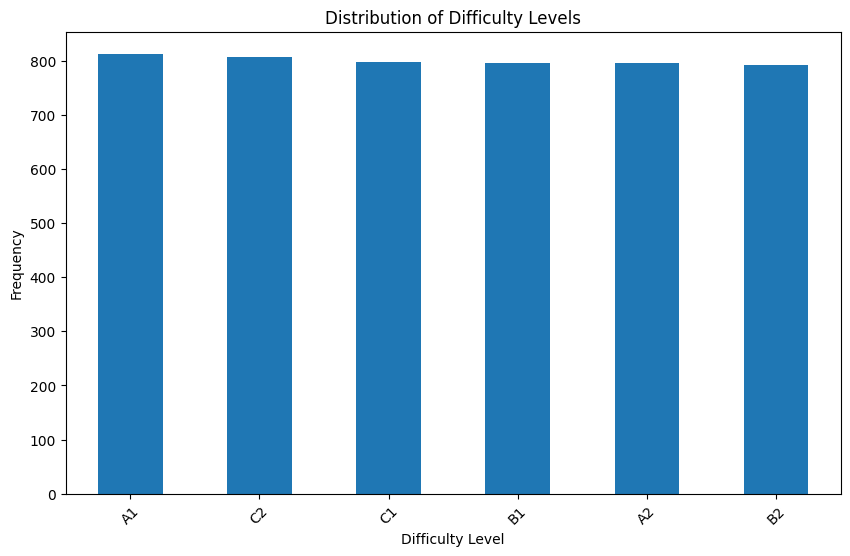

In [7]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
difficulty_counts.plot(kind='bar')
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Calculer la longueur de chaque phrase
training_data['sentence_length'] = training_data['sentence'].apply(len)

In [9]:
average_lengths = training_data.groupby('difficulty')['sentence_length'].mean()


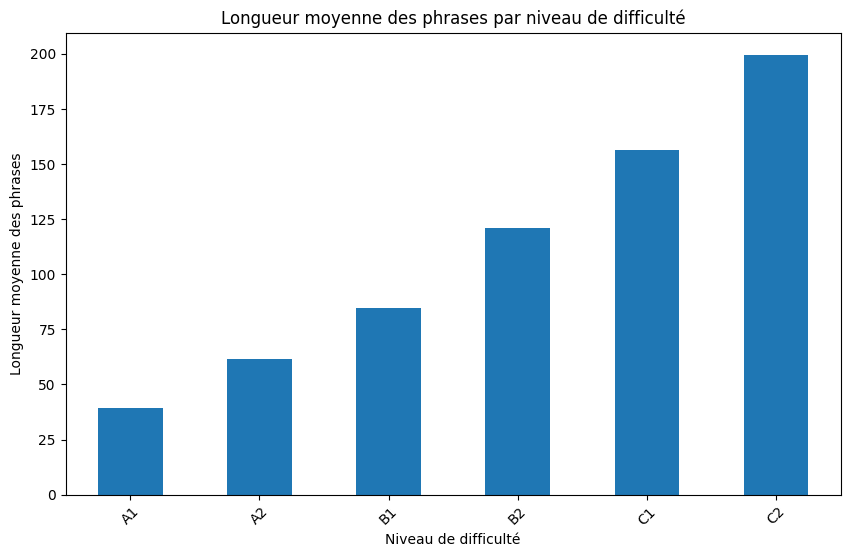

In [10]:
import matplotlib.pyplot as plt

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
average_lengths.plot(kind='bar')
plt.title('Longueur moyenne des phrases par niveau de difficulté')
plt.xlabel('Niveau de difficulté')
plt.ylabel('Longueur moyenne des phrases')
plt.xticks(rotation=45)
plt.show()


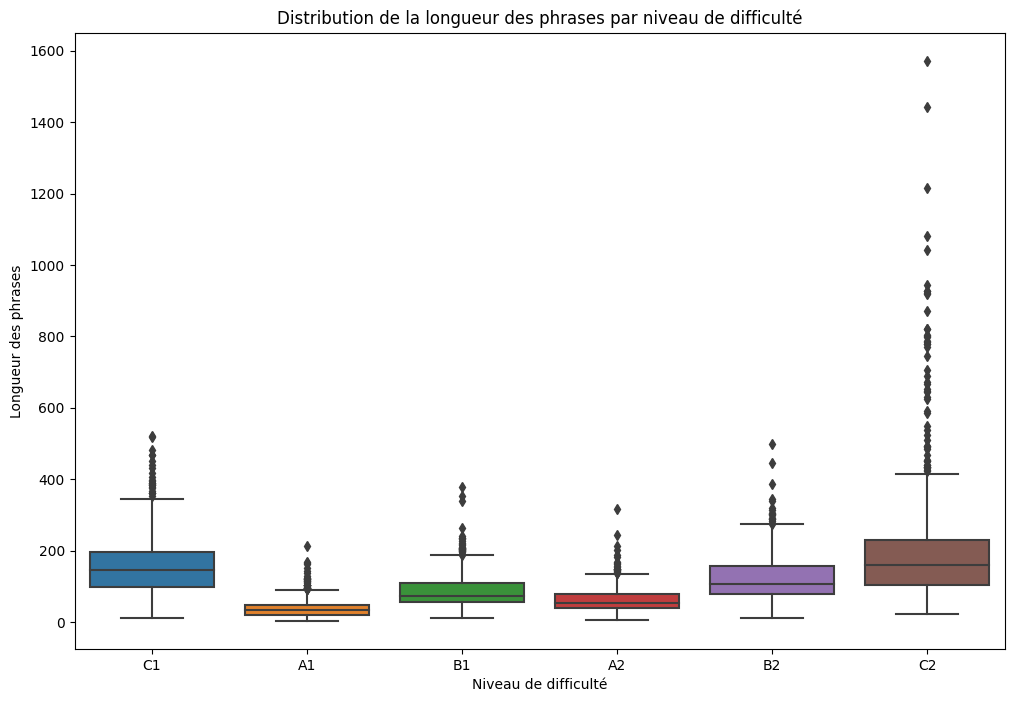

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='difficulty', y='sentence_length', data=training_data)
plt.title('Distribution de la longueur des phrases par niveau de difficulté')
plt.xlabel('Niveau de difficulté')
plt.ylabel('Longueur des phrases')
plt.show()


In [12]:
# Identifier les doublons
duplicates = training_data[training_data.duplicated(subset='sentence', keep=False)]

# Compter les doublons
num_duplicates = duplicates.shape[0]

print(f"Nombre de phrases en double : {num_duplicates}")


Nombre de phrases en double : 0


In [13]:
# Calcul de l'IQR
Q1 = training_data['sentence_length'].quantile(0.25)
Q3 = training_data['sentence_length'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = training_data[(training_data['sentence_length'] < lower_bound) | (training_data['sentence_length'] > upper_bound)]

print(f"Nombre d'outliers détectés : {outliers.shape[0]}")


Nombre d'outliers détectés : 205


In [14]:
# Afficher les outliers, si vous souhaitez les examiner
if outliers.shape[0] > 0:
    print("Voici les outliers détectés :")
    print(outliers)
else:
    print("Aucun outlier détecté.")


Voici les outliers détectés :
        id                                           sentence difficulty  \
59      59  Le train, en son temps, était également craint...         C1   
62      62  Compte tenu de cette configuration, cette zone...         C1   
72      72  Elle pendit son linge au dossier d'une chaise,...         C2   
74      74  J'ai identifié trois peurs fondamentales du ro...         C2   
85      85  Entre ceux qui ne jurent que par l'introductio...         C2   
...    ...                                                ...        ...   
4617  4617  On comprend qu'une semblable manière de compos...         C1   
4659  4659  De plus, la malnutrition frappe ceux qui devra...         C1   
4711  4711  Face à ce problème social, il préconise de réd...         C2   
4717  4717  Le fondateur, Aristide Finet, avait donné sa f...         C2   
4738  4738  Ce phénomène, poursuit la sociologue, résulte ...         B1   

      sentence_length  
59                300  
62       